In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/ushape.csv')

In [3]:
df.head()

,X,Y,class
0,0.0316,0.9870,0.0
1,2.1200,-0.0462,1.0
2,0.8820,-0.0758,0.0
3,-0.0551,-0.0373,1.0
4,0.8300,-0.5390,1.0


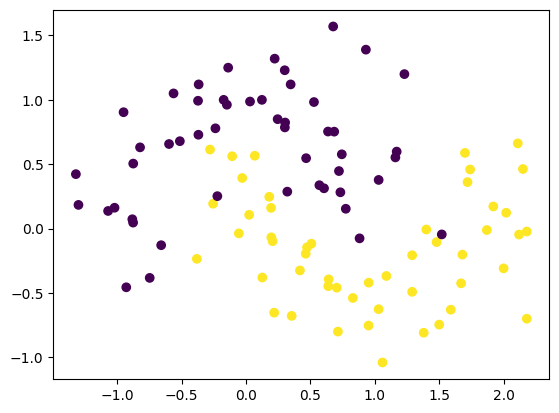

In [4]:
plt.scatter(df['X'],df['Y'],c=df['class'])

In [5]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [6]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [30]:
model = Sequential()

#model.add(Dense(2,activation='relu',input_dim=2)) #2 hidden layer 2 * 2 + 2 = 6
#model.add(Dense(2,activation='tanh',input_dim=2)) #2 hidden layer 2 * 2 + 2 = 6
model.add(Dense(10,activation='sigmoid',input_dim=2)) # 10 input --> 2 hidden layer 2 * 10 + 10 = 30
model.add(Dense(1,activation='sigmoid')) #2 * 1 + 1 = 3 // 10 * 1 + 10

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 10)                30        
                                                                 
 dense_11 (Dense)            (None, 1)                 11        
                                                                 
Total params: 41 (164.00 Byte)
Trainable params: 41 (164.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [31]:
# Set parameters to 0
model.get_weights()

[array([[ 0.42517012,  0.08809233,  0.63881284, -0.29891437,  0.5406502 ,
          0.17655295,  0.24788988, -0.22641236,  0.62005347, -0.51845765],
        [ 0.35445207, -0.16043198,  0.47850817, -0.1550237 ,  0.1447053 ,
          0.04150319, -0.42706424,  0.37052327,  0.19600558, -0.4485271 ]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.33510348],
        [-0.25698635],
        [-0.04336256],
        [ 0.5093685 ],
        [ 0.44555253],
        [ 0.6605132 ],
        [-0.28814068],
        [ 0.5262756 ],
        [ 0.29697126],
        [ 0.6961728 ]], dtype=float32),
 array([0.], dtype=float32)]

In [32]:
initial_weights = model.get_weights()

In [33]:
initial_weights[0] = np.zeros(model.get_weights()[0].shape)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.zeros(model.get_weights()[2].shape)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)

In [34]:
model.set_weights(initial_weights)

In [35]:
model.get_weights()

[array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]], dtype=float32),
 array([0.], dtype=float32)]

In [36]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [37]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 [==============================] - 1s 64ms/step - loss: 0.6935 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/100
3/3 [==============================] - 0s 11ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/100
3/3 [==============================] - 0s 11ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/100
3/3 [==============================] - 0s 11ms/step - loss: 0.6932 - accuracy: 0.4500 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/100
3/3 [==============================] - 0s 11ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 6/100
3/3 [==============================] - 0s 12ms/step - loss: 0.6932 - accuracy: 0.4750 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 7/100
3/3 [==============================] - 0s 13ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 8/100
3/3 [===

In [38]:
model.get_weights()

[array([[-0.4682467 , -0.4682467 , -0.4682467 , -0.4682467 , -0.4682467 ,
         -0.4682467 , -0.4682467 , -0.4682467 , -0.4682467 , -0.4682467 ],
        [ 0.48342714,  0.48342714,  0.48342714,  0.48342714,  0.48342714,
          0.48342714,  0.48342714,  0.48342714,  0.48342714,  0.48342714]],
       dtype=float32),
 array([-0.09830256, -0.09830256, -0.09830256, -0.09830256, -0.09830256,
        -0.09830256, -0.09830256, -0.09830256, -0.09830256, -0.09830256],
       dtype=float32),
 array([[-0.06521527],
        [-0.06521527],
        [-0.06521527],
        [-0.06521527],
        [-0.06521527],
        [-0.06521527],
        [-0.06521527],
        [-0.06521527],
        [-0.06521527],
        [-0.06521527]], dtype=float32),
 array([0.06236625], dtype=float32)]

9600/9600 [==============================] - 8s 845us/step


<Axes: >

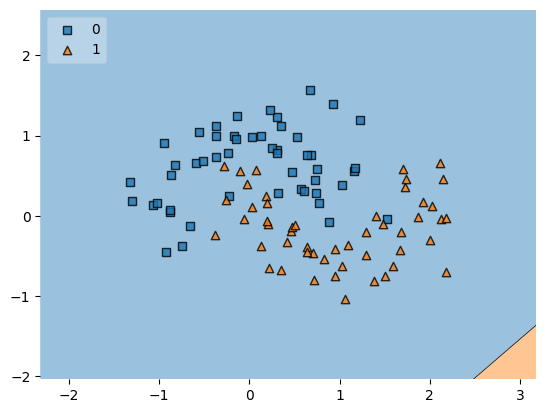

In [39]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)